In [3]:
import os
import numpy as np
import pandas as pd


df = pd.read_csv('/kaggle/input/geeksforgeeks-articles/articles.csv')
df.dropna(inplace = True)


In [4]:
df


,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy
...,...,...,...,...,...
34569,Data Structures | Queue | Question 11,GeeksforGeeks,"28 Jun, 2021",https://www.geeksforgeeks.org/data-structures-...,expert
34570,Data Structures | Binary Trees | Question 1,GeeksforGeeks,"28 Jun, 2021",https://www.geeksforgeeks.org/data-structures-...,expert
34571,Amazon Interview | Set 9,GeeksforGeeks,"28 Apr, 2017",https://www.geeksforgeeks.org/amazon-interview...,expert
34572,Python Program for Rat in a Maze | Backtracking-2,GeeksforGeeks,"02 Aug, 2021",https://www.geeksforgeeks.org/python-program-f...,expert


## 1) How many authors do we have in the dataset?

In [5]:
data=df.values
author=[]
for i in range(len(data)):
    author.append(data[i][1])
print("Total Authors ",len(author))
print("Unique Authors ",len(set(author)))

df['author_id'].nunique()


Total Authors  34551
Unique Authors  5589


5589

## 2) How many easy articles are publised on GeeksforGeeks?

In [26]:
print("Easy articles ",len(df[df['category']=='easy']))
print("Basic articles ",len(df[df['category']=='basic']))
print("Medium articles ",len(df[df['category']=='medium']))
print("Hard articles ",len(df[df['category']=='hard']))
print("Expert articles ",len(df[df['category']=='expert']))
print("Total articles ",len(df['category']))

Easy articles  9654
Basic articles  8140
Medium articles  10431
Hard articles  4232
Expert articles  2094
Total articles  34551


## 3) Which category is having most number of articles?

In [27]:
print(df.groupby('category').size().sort_values(ascending =False).head(1))
print(df['category'].describe())

category
medium    10431
dtype: int64
count      34551
unique         5
top       medium
freq       10431
Name: category, dtype: object


## 4) What percent of articles are in expert category out of total number of articles?

In [28]:
c=0
for i in range(len(data)):
    if(data[i][4]=='expert'):
        c+=1
print("Articles in Expert Category",c)
print("Expert/Total",(c/34551)*100)



Articles in Expert Category 2094
Expert/Total 6.0606060606060606


## 5) Who has written most number of articles after GeeksforGeeks?

In [29]:
print(df['author_id'].value_counts()[1:2])
print(df.groupby('author_id').size().sort_values(ascending= False))


ManasChhabra2    317
Name: author_id, dtype: int64
author_id
GeeksforGeeks    11957
ManasChhabra2      317
Striver            265
manjeet_04         246
Chinmoy Lenka      192
                 ...  
deft1991             1
deosurya2019         1
deprov447            1
dev247kumar          1
hemsharan2050        1
Length: 5589, dtype: int64


## 6) Who has written most number of articles in Expert Category after GeeksforGeeks?


In [30]:
print(df[df['category']=='expert'].author_id.value_counts()[1:2])


mishrapriyank17    36
Name: author_id, dtype: int64


## 7) Which day of the month has most number of articles published?

<AxesSubplot:xlabel='day'>

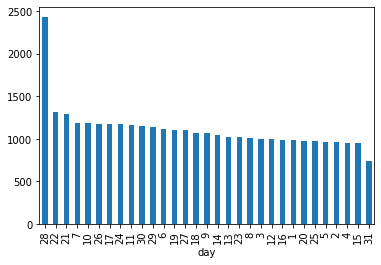

In [9]:
df = df[df['last_updated'] != 'Easy']
df = df[df['last_updated'] != 'Basic']
df = df[df['last_updated'] != 'Medium']
df = df[df['last_updated'] != 'Hard']
df = df[df['last_updated'] != 'Expert']
data = df.values
day   = []
month = []
year  = []
for i in range(len(data)):
    day.append(int(data[i][2].split(' ')[0]))
    month.append(data[i][2].split(' ')[1][:-1])
    year.append(int(data[i][2].split(' ')[2]))
    
df['day']   = day
df['month'] = month
df['year']  = year
df.groupby('day').size().sort_values(ascending=False).plot(kind='bar')


## 8) Which day of July has most number of articles published?

<AxesSubplot:xlabel='day'>

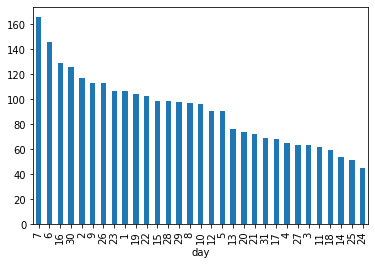

In [32]:
df_pr=df[df['month']=='Jul']
df_pr.groupby('day').size().sort_values(ascending=False).plot(kind='bar')

## 9) Which month has least number of articles published?

<AxesSubplot:xlabel='month'>

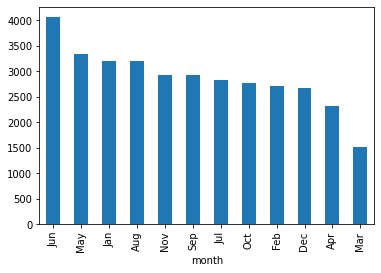

In [33]:
df.groupby('month').size().sort_values(ascending=False).plot(kind='bar')


## 10) Growth Rate of articles written 2021 as compare to 2020?

<AxesSubplot:xlabel='year'>

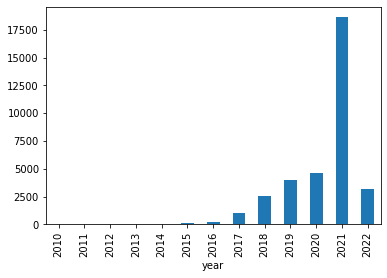

In [34]:

df.groupby('year').size().plot(kind = 'bar')


<AxesSubplot:xlabel='month'>

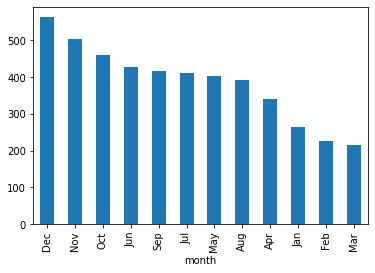

In [35]:
df_pr=df[df['year']==2020]
df_pr.groupby('month').size().sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='month'>

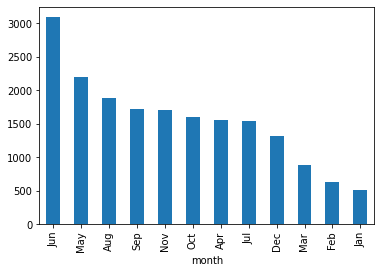

In [36]:
df_pr=df[df['year']==2021]
df_pr.groupby('month').size().sort_values(ascending=False).plot(kind='bar')

In [10]:
c=0
for i in range(len(data)):
    if(data[i][7]== 2020):
        c+=1
c1=0
for i in range(len(data)):
    if(data[i][7]==2021):
        c1+=1
        
print("Articles in 2020 ",c)
print("Articles in 2021",c1)
print("Growth Rate %= ",(c1/c)*100)

Articles in 2020  4625
Articles in 2021 18613
Growth Rate %=  402.4432432432432
